<a href="https://colab.research.google.com/github/neliudochka/WeightsHeights/blob/main/1lab_LiniearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML lab 1  
# Linear regression  
  
## Preparatory stage:
**1. Select a dataset and analyze it.**  
I chose [Heights and Weights Dataset](https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset/data).  
It contains two columns: height and weight. So the model should be able to predict the height from the given weight.  



In [1]:
#import module for data analysis
import pandas as pd
url = 'https://raw.githubusercontent.com/neliudochka/WeightsHeights/main/WeightHeight.csv'
data = pd.read_csv(url)
data.head(2)




,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873


**2. Determine input and output:**  
Input: weight  
Output: height  

**3.  Visualize the dependencies between inputs and outputs**


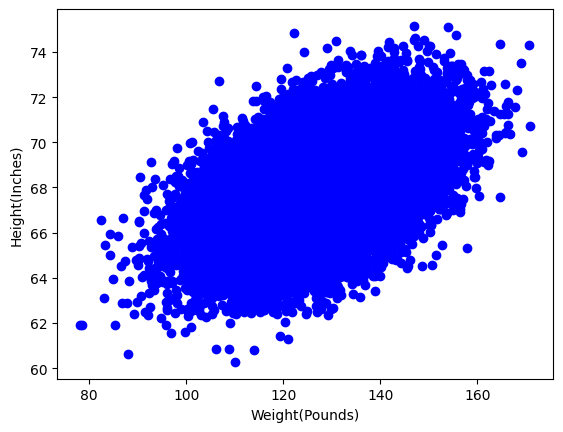

In [2]:
#module for visualization

import matplotlib.pyplot as plt

w = 'Weight(Pounds)'
h = 'Height(Inches)'

plt.plot(data[w], data[h], 'bo')
plt.xlabel(w)
plt.ylabel(h)
plt.show()


**4. Detect anomalies, incomplete samples in the data, etc**  
My dataset is clean, so no actions here


**5. To conduct correlational input of analyzes and outputs of the data set, to identify interdependent factors.**


In [6]:
import numpy as np

r = np.corrcoef(data[w], data[h])

print(f"correlation: {r[0][1]}")

correlation: 0.502858520602844



**6. Prepare data for further use.**



In [7]:
dataW = np.array(data[w]).reshape((-1, 1))


**7. Divide the selected and filtered data set into training and test data sets part (70% for training, 30% for the test).**

In [8]:
from sklearn.model_selection import train_test_split

wTrain, wTest, hTrain, hTest = train_test_split(dataW, data[h], test_size=0.3, random_state=1)

# Implementation of the model  

Write code in Python / R, which is implemented using three approaches to choose from:  
**1.SciKit learn**  

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(wTrain, hTrain)
h_model = model.predict(wTest)

Visualization


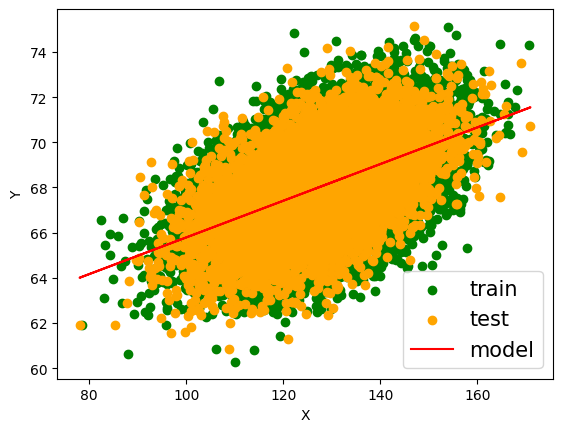

In [10]:
plt.scatter(wTrain, hTrain, color = 'green')
plt.scatter(wTest, hTest, color = 'orange')
plt.plot(wTest, h_model, color = 'red');

plt.legend(('train', 'test', 'model'),
           scatterpoints=1,
           loc='lower right',
           ncol=1,
           fontsize=15)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

Evaluating coef of determination

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(hTest, h_model)
r_sq = r2_score(hTest, h_model)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.26629637216003565


**2.XGBoost**  


In [12]:
from xgboost import XGBRegressor

xg_reg = XGBRegressor()

xg_reg.fit(wTrain, hTrain)

h_model = xg_reg.predict(wTest)
r_sq = r2_score(hTest, h_model)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.2542223823488048


Visualization


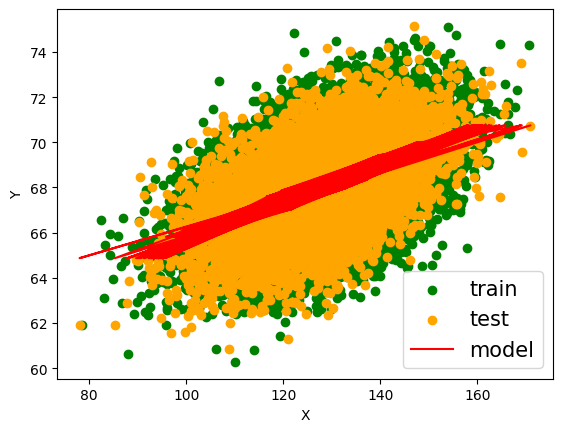

In [13]:
plt.scatter(wTrain, hTrain, color = 'green')
plt.scatter(wTest, hTest, color = 'orange')
plt.plot(wTest, h_model, color = 'red');

plt.legend(('train', 'test', 'model'),
           scatterpoints=1,
           loc='lower right',
           ncol=1,
           fontsize=15)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

**3.Vanilla Python (Numpy/Pandas)**  

It is prohibited to use libraries with already implemented similar algorithms (algorithms must be implemented independently). Built-in algorithms should be used only for comparison of own programmed algorithm.


In [ ]:
#тут має бути власна імплементація лінійної регресії